# **Page View Time Series Visualizer ⏳**
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1- Overview 🔎
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Introduction:** <br>

This project focuses on visualizing time series data related to the number of page views on the freeCodeCamp.org forum from May 9, 2016, to December 3, 2019. By leveraging Pandas, Matplotlib, and Seaborn, we aim to uncover patterns in daily visits, identify yearly and monthly growth, and present insights through various charts.

[freecodecamp | data-analysis-with-python-projects | Page View Time Series Visualizer](https://github.com/Anini-A/data-analysis-with-python/blob/main/Page%20View%20Time%20Series/Page%20View%20Time%20Series%20Visualizer.ipynb)

**Problem Statement:** <br>

The challenge lies in effectively utilizing data visualization techniques to illustrate the trends and patterns within the forum's page view data. This includes creating line charts, bar charts, and box plots to highlight daily, monthly, and yearly variations.

**Data Source:** <br>

The dataset, sourced from "fcc-forum-pageviews.csv," contains a time series of page views on the freeCodeCamp.org forum. The date column is utilized as the index to facilitate efficient analysis.

**Data Exploration:** <br>

1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3. Create a draw_line_plot function that uses Matplotlib to draw a line chart.
- The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
- The label on the x axis should be Date and the label on the y axis should be Page Views.
4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
- It should show average daily page views for each month grouped by year. 
- The legend should show month labels and have a title of Months. 
- On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots. 
- These box plots should show how the values are distributed within a given year or month and how it compares over time. 
- The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
- Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

## 2- Preparation 📖
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
- data collection
- data cleaning
- data transformation

In [45]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the data and check key stats
df = pd.read_csv('fcc-forum-pageviews.csv')
df.info()
df.head()
                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


#### Set the index to the date column.

In [47]:
# Set the 'date' column as the index
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Display the updated DataFrame
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [48]:
# Identify the threshold values for the top and bottom 2.5%
top_threshold = df['value'].quantile(0.975) # calculates the 97.5th percentile (top 2.5%) of the 'value' column.
bottom_threshold = df['value'].quantile(0.025) # calculates the 2.5th percentile (bottom 2.5%) of the 'value' column.

# Filter out the days outside the thresholds
df = df[(df['value'] >= bottom_threshold) & (df['value'] <= top_threshold)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## 3- Data Analysis 🕵️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Create a draw_line_plot function that uses Matplotlib to draw a line chart.
- The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
- The label on the x axis should be Date and the label on the y axis should be Page Views.

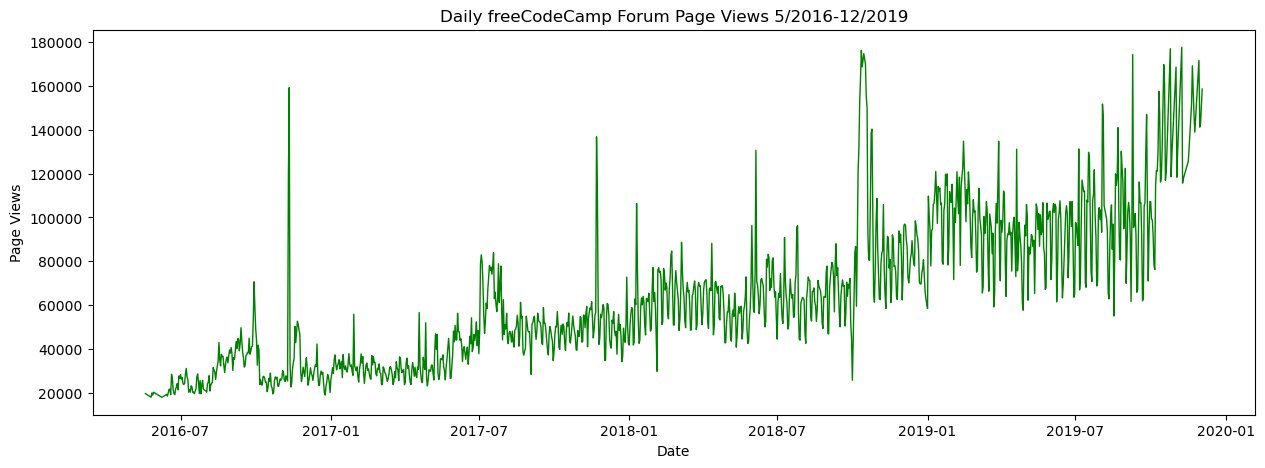

In [49]:
# Create draw_line_plot function
# def draw_line_plot(): for the replit code

# Create the line plot
fig, ax = plt.subplots(figsize=(15, 5)) 
ax.plot(df.index, df['value'], color='g', linewidth=1)

# Set the title and labels
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

# Display the plot
plt.show()

#### Create a draw_bar_plot function that draws a bar chart

- It should show average daily page views for each month grouped by year
- The legend should show month labels and have a title of Months
- The label on the x axis should be Years
- The label on the y axis should be Average Page Views

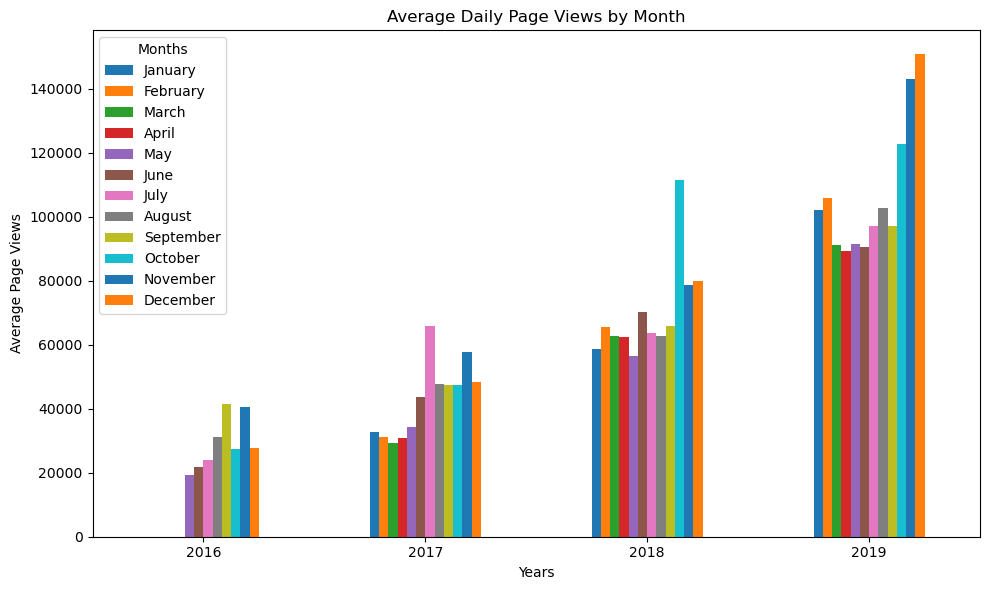

In [50]:
# Create draw_bar_plot() function
# def draw_bar_plot(): for the replit code

# Copy and modify data for monthly bar plot
df_bar = df.copy()

# we calculate the average daily page views grouped by year and month using groupby(['year', 'month'])['value'].mean().
df_avg_bar = df_bar.groupby([df_bar.index.year, df_bar.index.month]).mean().unstack()

# draw bar plot
fig, ax = plt.subplots(figsize=(10, 6))
df_avg_bar.plot(kind='bar', ax=ax)

# Set the title and labels
ax.set_title('Average Daily Page Views by Month')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

# Set the legend and its title
months = pd.to_datetime(df_avg_bar.columns.get_level_values(1), format='%m').strftime('%B')
ax.legend(title='Months', labels=months)

# Format the x-axis tick labels to show the year
ax.set_xticklabels(df_avg_bar.index, rotation=0)

# Save image
fig.savefig('bar_plot.png')

# Display the plot
plt.tight_layout() #ensuring all elements fits in the figure area
plt.show()

#### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- These box plots should show how the values are distributed within a given year or month and how it compares over time. 
- The title of the first chart should be Year-wise Box Plot (Trend)
- The title of the second chart should be Month-wise Box Plot (Seasonality). 
- Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

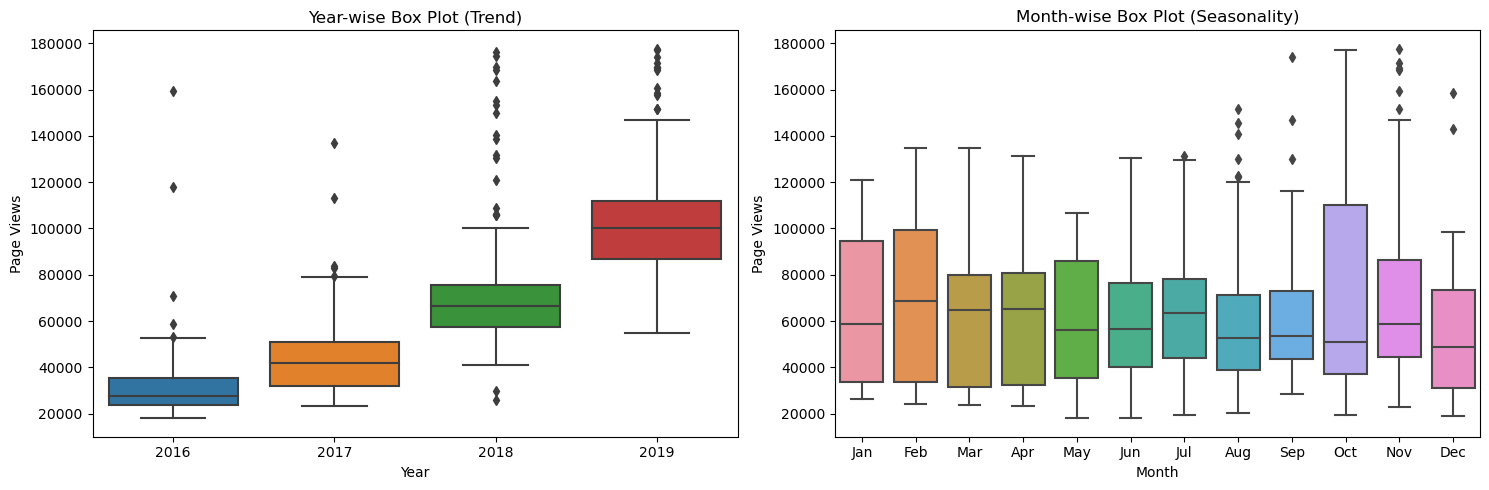

In [51]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot for yearly data
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Box plot for monthly data
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=order)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

# Adjust the layout
plt.tight_layout()

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')

## 4- Conclusion ✍️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

1. Year-wise Box Plot:

- Gradual Increase in Page Views:

Page views on freeCodeCamp increased gradually from around 30K in 2016 to approximately 100K in 2019.
This indicates a positive trend in user engagement or interest over the specified years.

- Slight Increase in Median Views (2017-2019):

There is a noticeable uptick in the median page views from 2017 to 2019.
The rising median suggests an increase in the typical or middle range of page views during these years.

- Outliers in 2018 and 2019:

The presence of more outliers in 2018 and 2019, particularly in the third quartile, suggests periods with exceptionally high page views during those years.
Notably, 2018 and 2019 show the most outliers, indicating potential spikes or special events influencing page views.

2. Month-wise Box Plot:

- Consistent Median Views (January-December):

The month-wise box plot shows a consistent median page views range of 55K to 75K throughout the year.
This suggests stability in user engagement on a monthly basis.

- Outliers in Third Quartile (August-December):

Outliers in the third quartile, especially from August to December, indicate periods with significantly higher page views than the typical monthly range.
These months may correspond to specific events, campaigns, or seasonal variations that led to increased user activity.